In [78]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [79]:
tf.__version__

'2.10.0'

In [80]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range= 0.2 , zoom_range= 0.2, horizontal_flip=True)

In [81]:
training_set = train_datagen.flow_from_directory('C:\\SCDProject\\svmModel\\Pretraining', target_size=(64,64), batch_size=32 , class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('C:\\SCDProject\\svmModel\\Pretraining', target_size=(64,64), batch_size=32 , class_mode='binary')

Found 7845 images belonging to 2 classes.
Found 7845 images belonging to 2 classes.


In [82]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [83]:
from  tensorflow.keras.regularizers import l2

In [84]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [85]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [86]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 35)

Epoch 1/35
246/246 [==============================] - 99s 393ms/step - loss: 0.7560 - accuracy: 0.6670 - val_loss: 0.5845 - val_accuracy: 0.7722
Epoch 2/35
246/246 [==============================] - 77s 315ms/step - loss: 0.5315 - accuracy: 0.7509 - val_loss: 0.5038 - val_accuracy: 0.8023
Epoch 3/35
246/246 [==============================] - 82s 332ms/step - loss: 0.4911 - accuracy: 0.7669 - val_loss: 0.4488 - val_accuracy: 0.7901
Epoch 4/35
246/246 [==============================] - 79s 321ms/step - loss: 0.4626 - accuracy: 0.7808 - val_loss: 0.4527 - val_accuracy: 0.7995
Epoch 5/35
246/246 [==============================] - 77s 313ms/step - loss: 0.4452 - accuracy: 0.7901 - val_loss: 0.4682 - val_accuracy: 0.8186
Epoch 6/35
246/246 [==============================] - 77s 315ms/step - loss: 0.4254 - accuracy: 0.7987 - val_loss: 0.4127 - val_accuracy: 0.8280
Epoch 7/35
246/246 [==============================] - 82s 333ms/step - loss: 0.4116 - accuracy: 0.8073 - val_loss: 0.3920 - val_ac

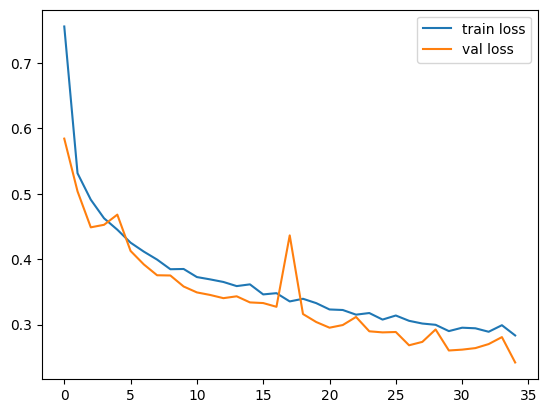

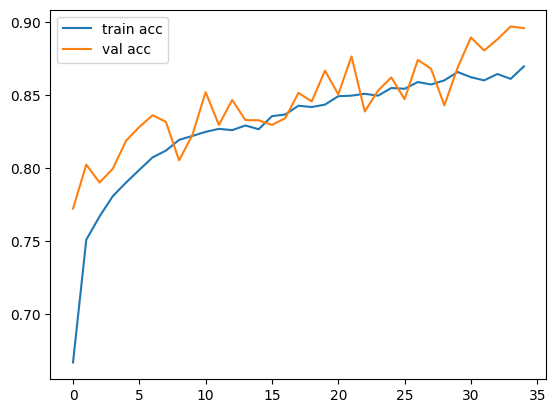

<Figure size 640x480 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [88]:
from tensorflow.keras.models import load_model

cnn.save('model_bcc_mel.h5')
from tensorflow.keras.models import load_model

# load model
model = load_model('model_bcc_mel.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [101]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
path = 'C:\SCDProject\svmModel\Pretraining\BCC'
j = 0
pos = 0
neg = 0
for i in os.listdir(path):
    test_image = image.load_img(path+'\\'+i, target_size = (64,64))
    test_image = image.img_to_array(test_image)
    test_image=test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result)
    if result<0:
        neg = neg+1
    else:
        pos = pos+1
    j = j+1
    if(j==150):
        break



1/1 [==============================] - 1s 630ms/step
[[-1.2511702]]
1/1 [==============================] - 0s 89ms/step
[[0.13228619]]
1/1 [==============================] - 0s 73ms/step
[[-1.2174923]]
1/1 [==============================] - 0s 81ms/step
[[-1.076596]]
1/1 [==============================] - 0s 301ms/step
[[-0.47689474]]
1/1 [==============================] - 0s 156ms/step
[[-1.4833018]]
1/1 [==============================] - 0s 117ms/step
[[-0.32221863]]
1/1 [==============================] - 0s 161ms/step
[[0.7642344]]
1/1 [==============================] - 0s 104ms/step
[[-1.5358799]]
1/1 [==============================] - 0s 86ms/step
[[-1.1167624]]
1/1 [==============================] - 0s 73ms/step
[[-1.0546975]]
1/1 [==============================] - 0s 57ms/step
[[0.9637997]]
1/1 [==============================] - 0s 49ms/step
[[-1.185159]]
1/1 [==============================] - 0s 48ms/step
[[1.6664317]]
1/1 [==============================] - 0s 53ms/step
[[-1.44

In [66]:
result

array([[5.0460787]], dtype=float32)

In [102]:
print(pos)

17


In [103]:
print(neg)

133
